In [10]:
from __future__ import print_function
import os
# Type Path
data_path = [r'C:\Users\wpghk\ai_data']

import pandas as pd
import numpy as np


filepath = os.sep.join(data_path + ['Wine_Quality_Data.csv'])
data = pd.read_csv(filepath, sep=',')

In [11]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler, LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier 

import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
data['color'] = data.color.replace('white',0).replace('red',1).astype(np.int)

In [13]:
target = 'color'
feature_cols = [x for x in data.columns if x != target]

# Split the data into two parts with 1500 points in the test data
# This creates a generator
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(data[feature_cols], data[target]))

# Create the data sets
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, target]

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, target]

In [14]:
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)

In [15]:
def print_score(classifier, X_train, y_train, X_test, y_test, train = True):
    if train == True:
        y_pred = classifier.predict(X_train)
        print("Training result:\n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_train, y_pred)))
        print("Classification Report:\n{}\n".format(classification_report(y_train, y_pred)))
        print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_train, y_pred)))
        res = cross_val_score(classifier, X_train, y_train, cv = 10, n_jobs= -1, scoring ="accuracy")
        print("Average Accuracy:\t{0:.4f}\n".format(res.mean()))
        print("Standard Deviation:\t{0:.4f}".format(res.std()))
    elif train == False:
        y_pred = classifier.predict(X_test)
        print("Test result:\n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_test, y_pred)))
        print("Classification Report:\n{}\n".format(classification_report(y_test, y_pred)))
        print("Confusion Matrix:\n{}\n".format(confusion_matrix(y_test, y_pred)))

Model

    Random Forest Classifier(NOT SCALE)
    KNeighbors Classifier
    Naive Bayes
    Logistic Regression
    Decision Tree Classifier
    
    Support Vector Classifier(MUST SCALE)
   

In [16]:
random_forest = RandomForestClassifier(n_estimators = 50, criterion='entropy',random_state = 42)
random_forest.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

dt = DecisionTreeClassifier(max_depth = 11, random_state = 42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [17]:
print_score(random_forest ,X_train,y_train,X_test,y_test, train = True)
print('-'*100)
print_score(random_forest ,X_train,y_train,X_test,y_test, train = False)

Training result:

Accuracy Score: 0.9998

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3428
          1       1.00      1.00      1.00      1119

avg / total       1.00      1.00      1.00      4547


Confusion Matrix:
[[3427    1]
 [   0 1119]]

Average Accuracy:	0.9936

Standard Deviation:	0.0029
----------------------------------------------------------------------------------------------------
Test result:

Accuracy Score: 0.9959

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1470
          1       1.00      0.99      0.99       480

avg / total       1.00      1.00      1.00      1950


Confusion Matrix:
[[1469    1]
 [   7  473]]



In [17]:
print_score(knn ,X_train,y_train,X_test,y_test, train = True)
print_score(knn ,X_train,y_train,X_test,y_test, train = False)

Training result:

Accuracy Score: 0.9932

Classification Report:
             precision    recall  f1-score   support

          0       0.99      1.00      1.00      3767
          1       0.99      0.98      0.99      1230

avg / total       0.99      0.99      0.99      4997


Confusion Matrix:
[[3754   13]
 [  21 1209]]

Average Accuracy:	0.9908

Standard Deviation:	0.0037
Test result:

Accuracy Score: 0.9900

Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1131
          1       0.98      0.98      0.98       369

avg / total       0.99      0.99      0.99      1500


Confusion Matrix:
[[1123    8]
 [   7  362]]



In [10]:
print_score(gnb ,X_train,y_train,X_test,y_test, train = True)
print_score(gnb ,X_train,y_train,X_test,y_test, train = False)
print_score(bnb ,X_train,y_train,X_test,y_test, train = True)
print_score(bnb ,X_train,y_train,X_test,y_test, train = False)
print_score(mnb ,X_train,y_train,X_test,y_test, train = True)
print_score(mnb ,X_train,y_train,X_test,y_test, train = False)

Training result:

Accuracy Score: 0.9710

Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.97      0.98      3767
          1       0.92      0.97      0.94      1230

avg / total       0.97      0.97      0.97      4997


Confusion Matrix:
[[3661  106]
 [  39 1191]]

Average Accuracy:	0.9704

Standard Deviation:	0.0057
Test result:

Accuracy Score: 0.9740

Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.98      0.98      1131
          1       0.93      0.97      0.95       369

avg / total       0.97      0.97      0.97      1500


Confusion Matrix:
[[1104   27]
 [  12  357]]

Training result:

Accuracy Score: 0.7717

Classification Report:
             precision    recall  f1-score   support

          0       0.77      1.00      0.87      3767
          1       0.87      0.09      0.16      1230

avg / total       0.79      0.77      0.69      4997


Confusion Matrix

In [11]:
print_score(logreg ,X_train,y_train,X_test,y_test, train = True)
print_score(logreg ,X_train,y_train,X_test,y_test, train = False)

Training result:

Accuracy Score: 0.9800

Classification Report:
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      3767
          1       0.97      0.95      0.96      1230

avg / total       0.98      0.98      0.98      4997


Confusion Matrix:
[[3729   38]
 [  62 1168]]

Average Accuracy:	0.9800

Standard Deviation:	0.0063
Test result:

Accuracy Score: 0.9867

Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1131
          1       0.98      0.97      0.97       369

avg / total       0.99      0.99      0.99      1500


Confusion Matrix:
[[1123    8]
 [  12  357]]



In [12]:
print_score(dt ,X_train,y_train,X_test,y_test, train = True)
print_score(dt ,X_train,y_train,X_test,y_test, train = False)
dt.tree_.node_count, dt.tree_.max_depth

Training result:

Accuracy Score: 0.9986

Classification Report:
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3767
          1       1.00      1.00      1.00      1230

avg / total       1.00      1.00      1.00      4997


Confusion Matrix:
[[3766    1]
 [   6 1224]]

Average Accuracy:	0.9852

Standard Deviation:	0.0038
Test result:

Accuracy Score: 0.9887

Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1131
          1       0.98      0.98      0.98       369

avg / total       0.99      0.99      0.99      1500


Confusion Matrix:
[[1123    8]
 [   9  360]]



(121, 11)

Scaled data Model

    SVM

In [13]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train, y_train)

print_score(svm ,X_train,y_train,X_test,y_test, train = True)
print_score(svm ,X_train,y_train,X_test,y_test, train = False)

Training result:

Accuracy Score: 0.9878

Classification Report:
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      3767
          1       0.99      0.96      0.97      1230

avg / total       0.99      0.99      0.99      4997


Confusion Matrix:
[[3753   14]
 [  47 1183]]

Average Accuracy:	0.9874

Standard Deviation:	0.0051
Test result:

Accuracy Score: 0.9920

Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      0.99      1131
          1       0.98      0.99      0.98       369

avg / total       0.99      0.99      0.99      1500


Confusion Matrix:
[[1122    9]
 [   3  366]]



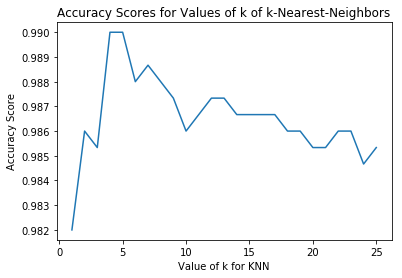

[0.982,
 0.986,
 0.9853333333333333,
 0.99,
 0.99,
 0.988,
 0.9886666666666667,
 0.988,
 0.9873333333333333,
 0.986,
 0.9866666666666667,
 0.9873333333333333,
 0.9873333333333333,
 0.9866666666666667,
 0.9866666666666667,
 0.9866666666666667,
 0.9866666666666667,
 0.986,
 0.986,
 0.9853333333333333,
 0.9853333333333333,
 0.986,
 0.986,
 0.9846666666666667,
 0.9853333333333333]

In [14]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()
scores